## Importing all libraries

In [110]:
#import all libraries
import numpy as np 
import matplotlib.pyplot as plt  
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,
from xgboost import XGBRegressor
from scipy.stats import pearsonr
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')

SyntaxError: trailing comma not allowed without surrounding parentheses (805880122.py, line 8)

In [ ]:
# read the file
df2 = pd.read_csv('initiation_combined.csv')
df = df2.drop(['gene_name'],axis=1)
df['folding_energy_70'] = pd.to_numeric(df['folding_energy_70'], errors='coerce')
df['folding_energy_70'] = df['folding_energy_70'].fillna(0)

## Filtering the data using 5th and 95th percentiles

In [ ]:
# Calculate the 5th and 95th percentiles
lower_percentile = df['romano_initiation_rate'].quantile(0.05)
upper_percentile = df['romano_initiation_rate'].quantile(0.95)

# Filter the DataFrame
df = df[(df['romano_initiation_rate'] >= lower_percentile) & (df['romano_initiation_rate'] <= upper_percentile)]
df

In [ ]:
print(df['romano_initiation_rate'].min())
print(df['romano_initiation_rate'].max())

In [ ]:
corr = df.corr()
print(corr.romano_initiation_rate.sort_values(ascending=False))

## Assigning the target variable and train-test split

In [ ]:
X = df.drop('romano_initiation_rate',axis=1)
y = df['romano_initiation_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Hyperparamter Tuning

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_depth': [3, 5, 7, 10, 20, 25, 30, 35, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2,0.5],
    'min_child_weight': [1, 3, 5,7,10]
}

In [ ]:
# Create a XGBRegressor object
xgr = XGBRegressor(objective='reg:squarederror')
xgr_randomcv=RandomizedSearchCV(estimator=xgr,param_distributions=param_grid,n_iter=50,
                               cv=5,verbose=2,n_jobs=-1,random_state=42)

In [111]:
### fit the randomized model
xgr_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/py

  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype)

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/s

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/sulagno/anaconda3/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'max_depth': [3, 5, 7, 10, 20, 25, 30,
                                                      35, 40, 50],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300, 350, 400,
                                                         450, 500]},
                   random_state=42, verbose=2)

In [112]:
model = xgr_randomcv.best_estimator_

In [119]:
data_train = pd.DataFrame(columns=['Pearson R', 'MSE'])
data_test = pd.DataFrame(columns=['Pearson R', 'MSE'])

# Cross validation method defined
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X_train):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

    # Use a different variable name for the model inside the loop
    cv_model = model.fit(X1_train, y1_train)

    y_train_pred = cv_model.predict(X1_train)
    r_train, _ = pearsonr(y1_train, y_train_pred)
    mse_train = mean_squared_error(y1_train, y_train_pred)

    y_test_pred = cv_model.predict(X1_test)
    r_test, _ = pearsonr(y1_test, y_test_pred)
    mse_test = mean_squared_error(y1_test, y_test_pred)
    
    data_train = pd.concat([data_train, pd.DataFrame({'Pearson R': r_train, 'MSE': mse_train} ,
                                                     index=[0])], ignore_index=True)
    data_test = pd.concat([data_test, pd.DataFrame({'Pearson R': r_train, 'MSE': mse_train} ,
                                                     index=[0])], ignore_index=True)
print('Train set\n',data_train), print('Test set\n',data_test)

Train set
    Pearson R       MSE
0   0.910797  0.000424
1   0.916956  0.000417
2   0.903728  0.000462
3   0.919314  0.000403
4   0.914384  0.000416
Test set
    Pearson R       MSE
0   0.910797  0.000424
1   0.916956  0.000417
2   0.903728  0.000462
3   0.919314  0.000403
4   0.914384  0.000416


(None, None)

In [114]:
y_train_pred = model.predict(X_train)
r_train, _ = pearsonr(y_train, y_train_pred)
print(r_train)
y_test_pred = model.predict(X_test)
r_test, _ = pearsonr(y_test, y_test_pred)
print(r_test)

0.807501020192714
0.7924718745111676


## Model Prediction

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## PearsonR for train and test data

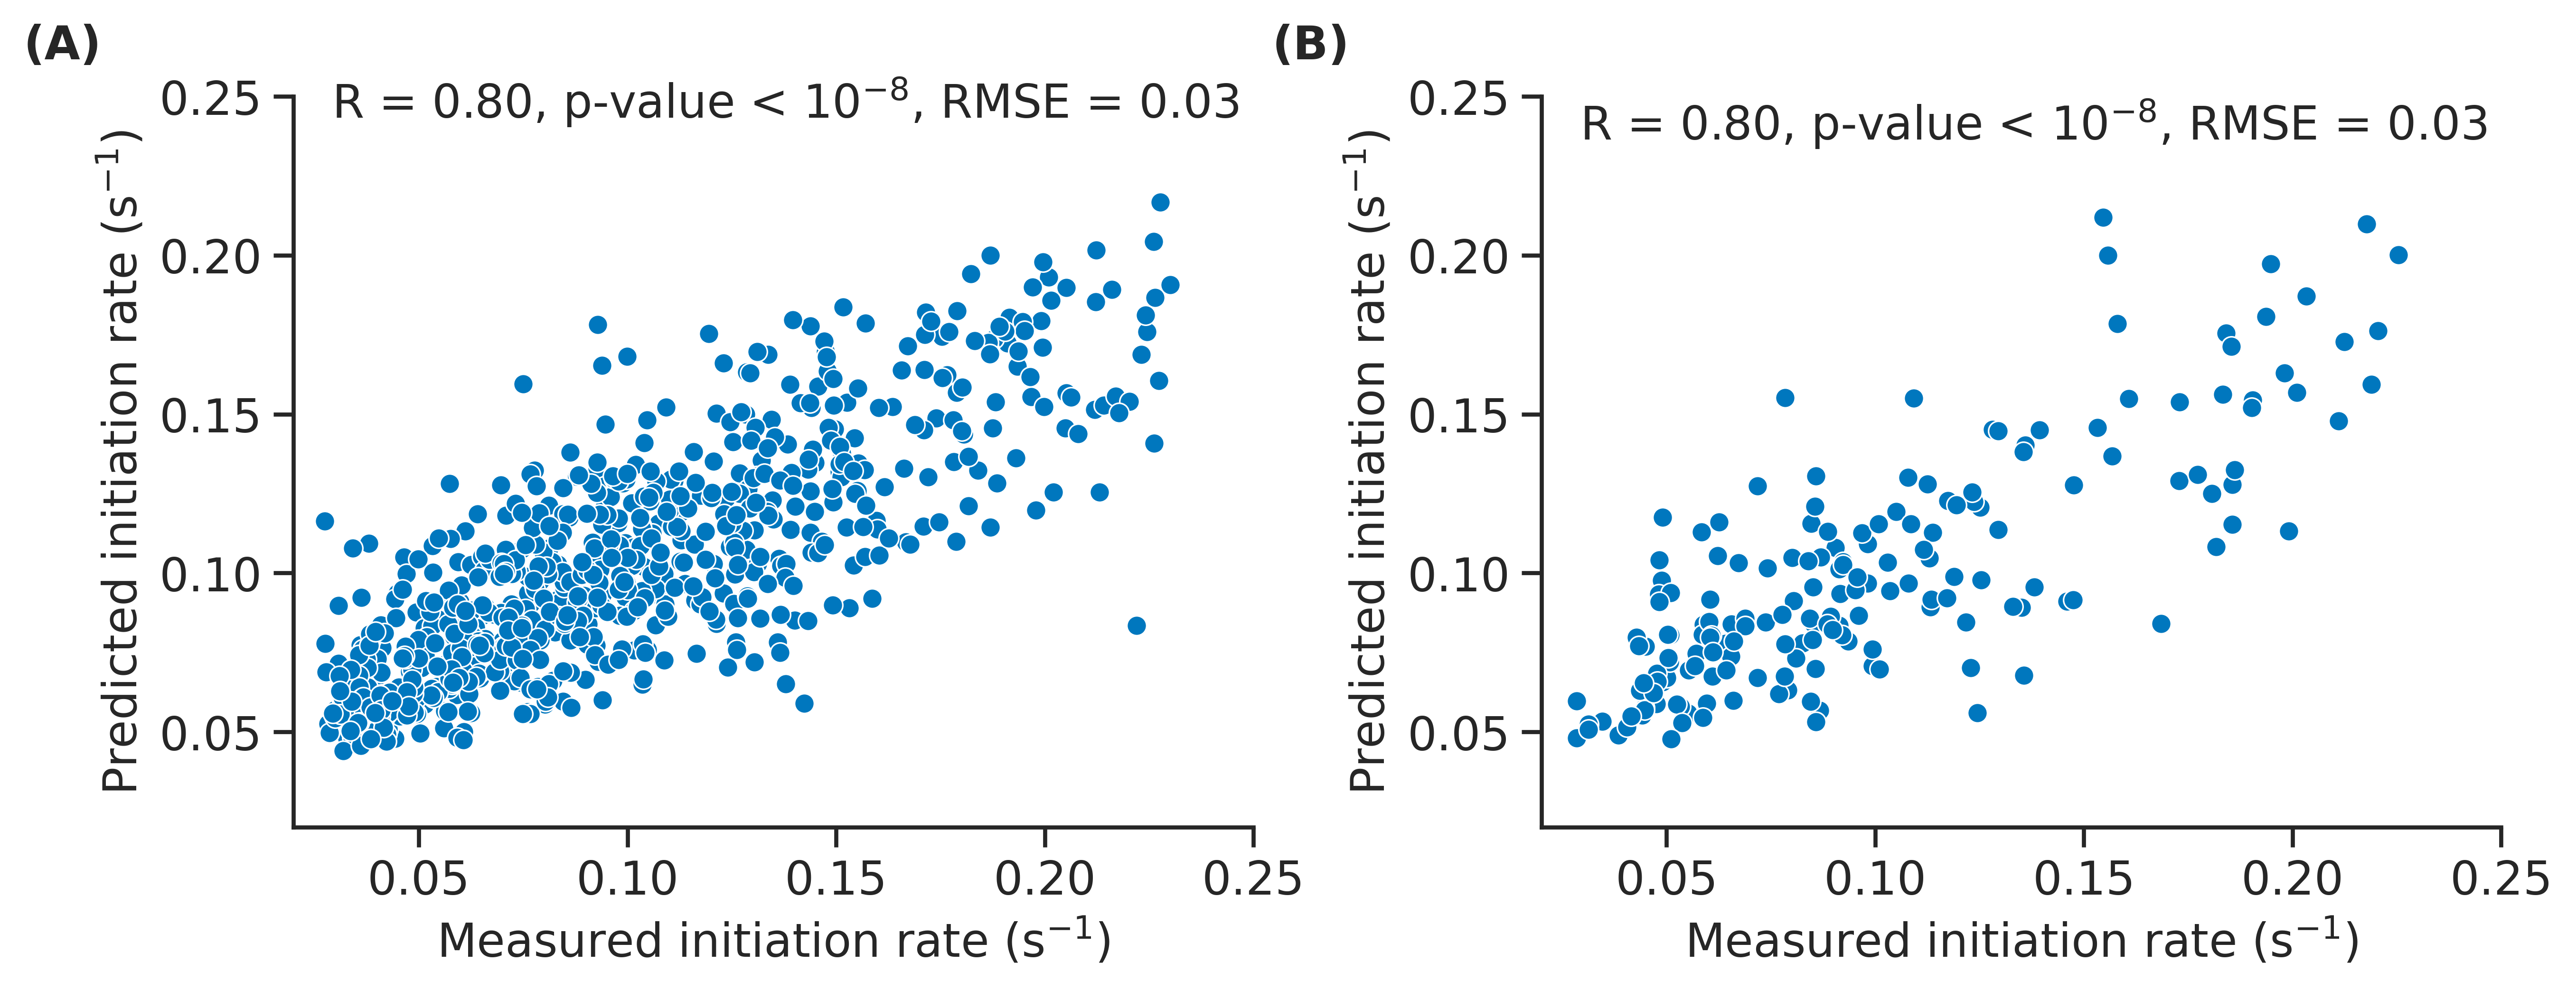

In [637]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4), dpi=500)

# Training set
sns.scatterplot(x=y_train, y=y_train_pred, ax=ax1, color='#0077be')
ax1.set_xlabel(r"Measured initiation rate ($\mathrm{s^{-1}}$)", fontsize=14)
ax1.set_ylabel(r"Predicted initiation rate ($\mathrm{s^{-1}}$)", fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=14)
r_train, p_train = pearsonr(x=y_train, y=y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
i = 0
p_train_exp = f"{p_train:.0e}"
if p_train < 1e-8:
    p_train_exp = 'p-value < 10$^{-8}$'
else:
    p_train_exp_parts = p_train_exp.split('e')
    p_train_exp = f"{p_train_exp_parts[0]} × 10$^{{{p_train_exp_parts[1]}}}$"
ax1.text(0.04, 1.03, f"R = {r_train:.2f}, {p_train_exp}, RMSE = {rmse_train:.2f}", transform=ax1.transAxes, fontsize=14, verticalalignment='top')
ax1.text(-0.2, 1.1, f'({chr(65 + i)})', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# Test set
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax2, color='#0077be')
ax2.set_xlabel(r"Measured initiation rate ($\mathrm{s^{-1}}$)", fontsize=14)
ax2.set_ylabel(r"Predicted initiation rate ($\mathrm{s^{-1}}$)", fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', labelsize=14)
r_test, p_test = pearsonr(x=y_test, y=y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
i = 1
p_test_exp = f"{p_test:.0e}"
if p_test < 1e-8:
    p_test_exp = 'p-value < 10$^{-8}$'
else:
    p_test_exp_parts = p_test_exp.split('e')
    p_test_exp = f"{p_test_exp_parts[0]} × 10$^{{{p_test_exp_parts[1]}}}$"
ax2.text(0.04, 1, f"R = {r_test:.2f}, {p_test_exp}, RMSE = {rmse_test:.2f}", transform=ax2.transAxes, fontsize=14, verticalalignment='top')
ax2.text(-0.2, 1.1, f'({chr(65 + i)})', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax1.set_ylim(0.02, 0.25)
ax1.set_xlim(0.02, 0.25)
ax2.set_ylim(0.02, 0.25)
ax2.set_xlim(0.02, 0.25)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.show()

## Residual plot for train and test combined

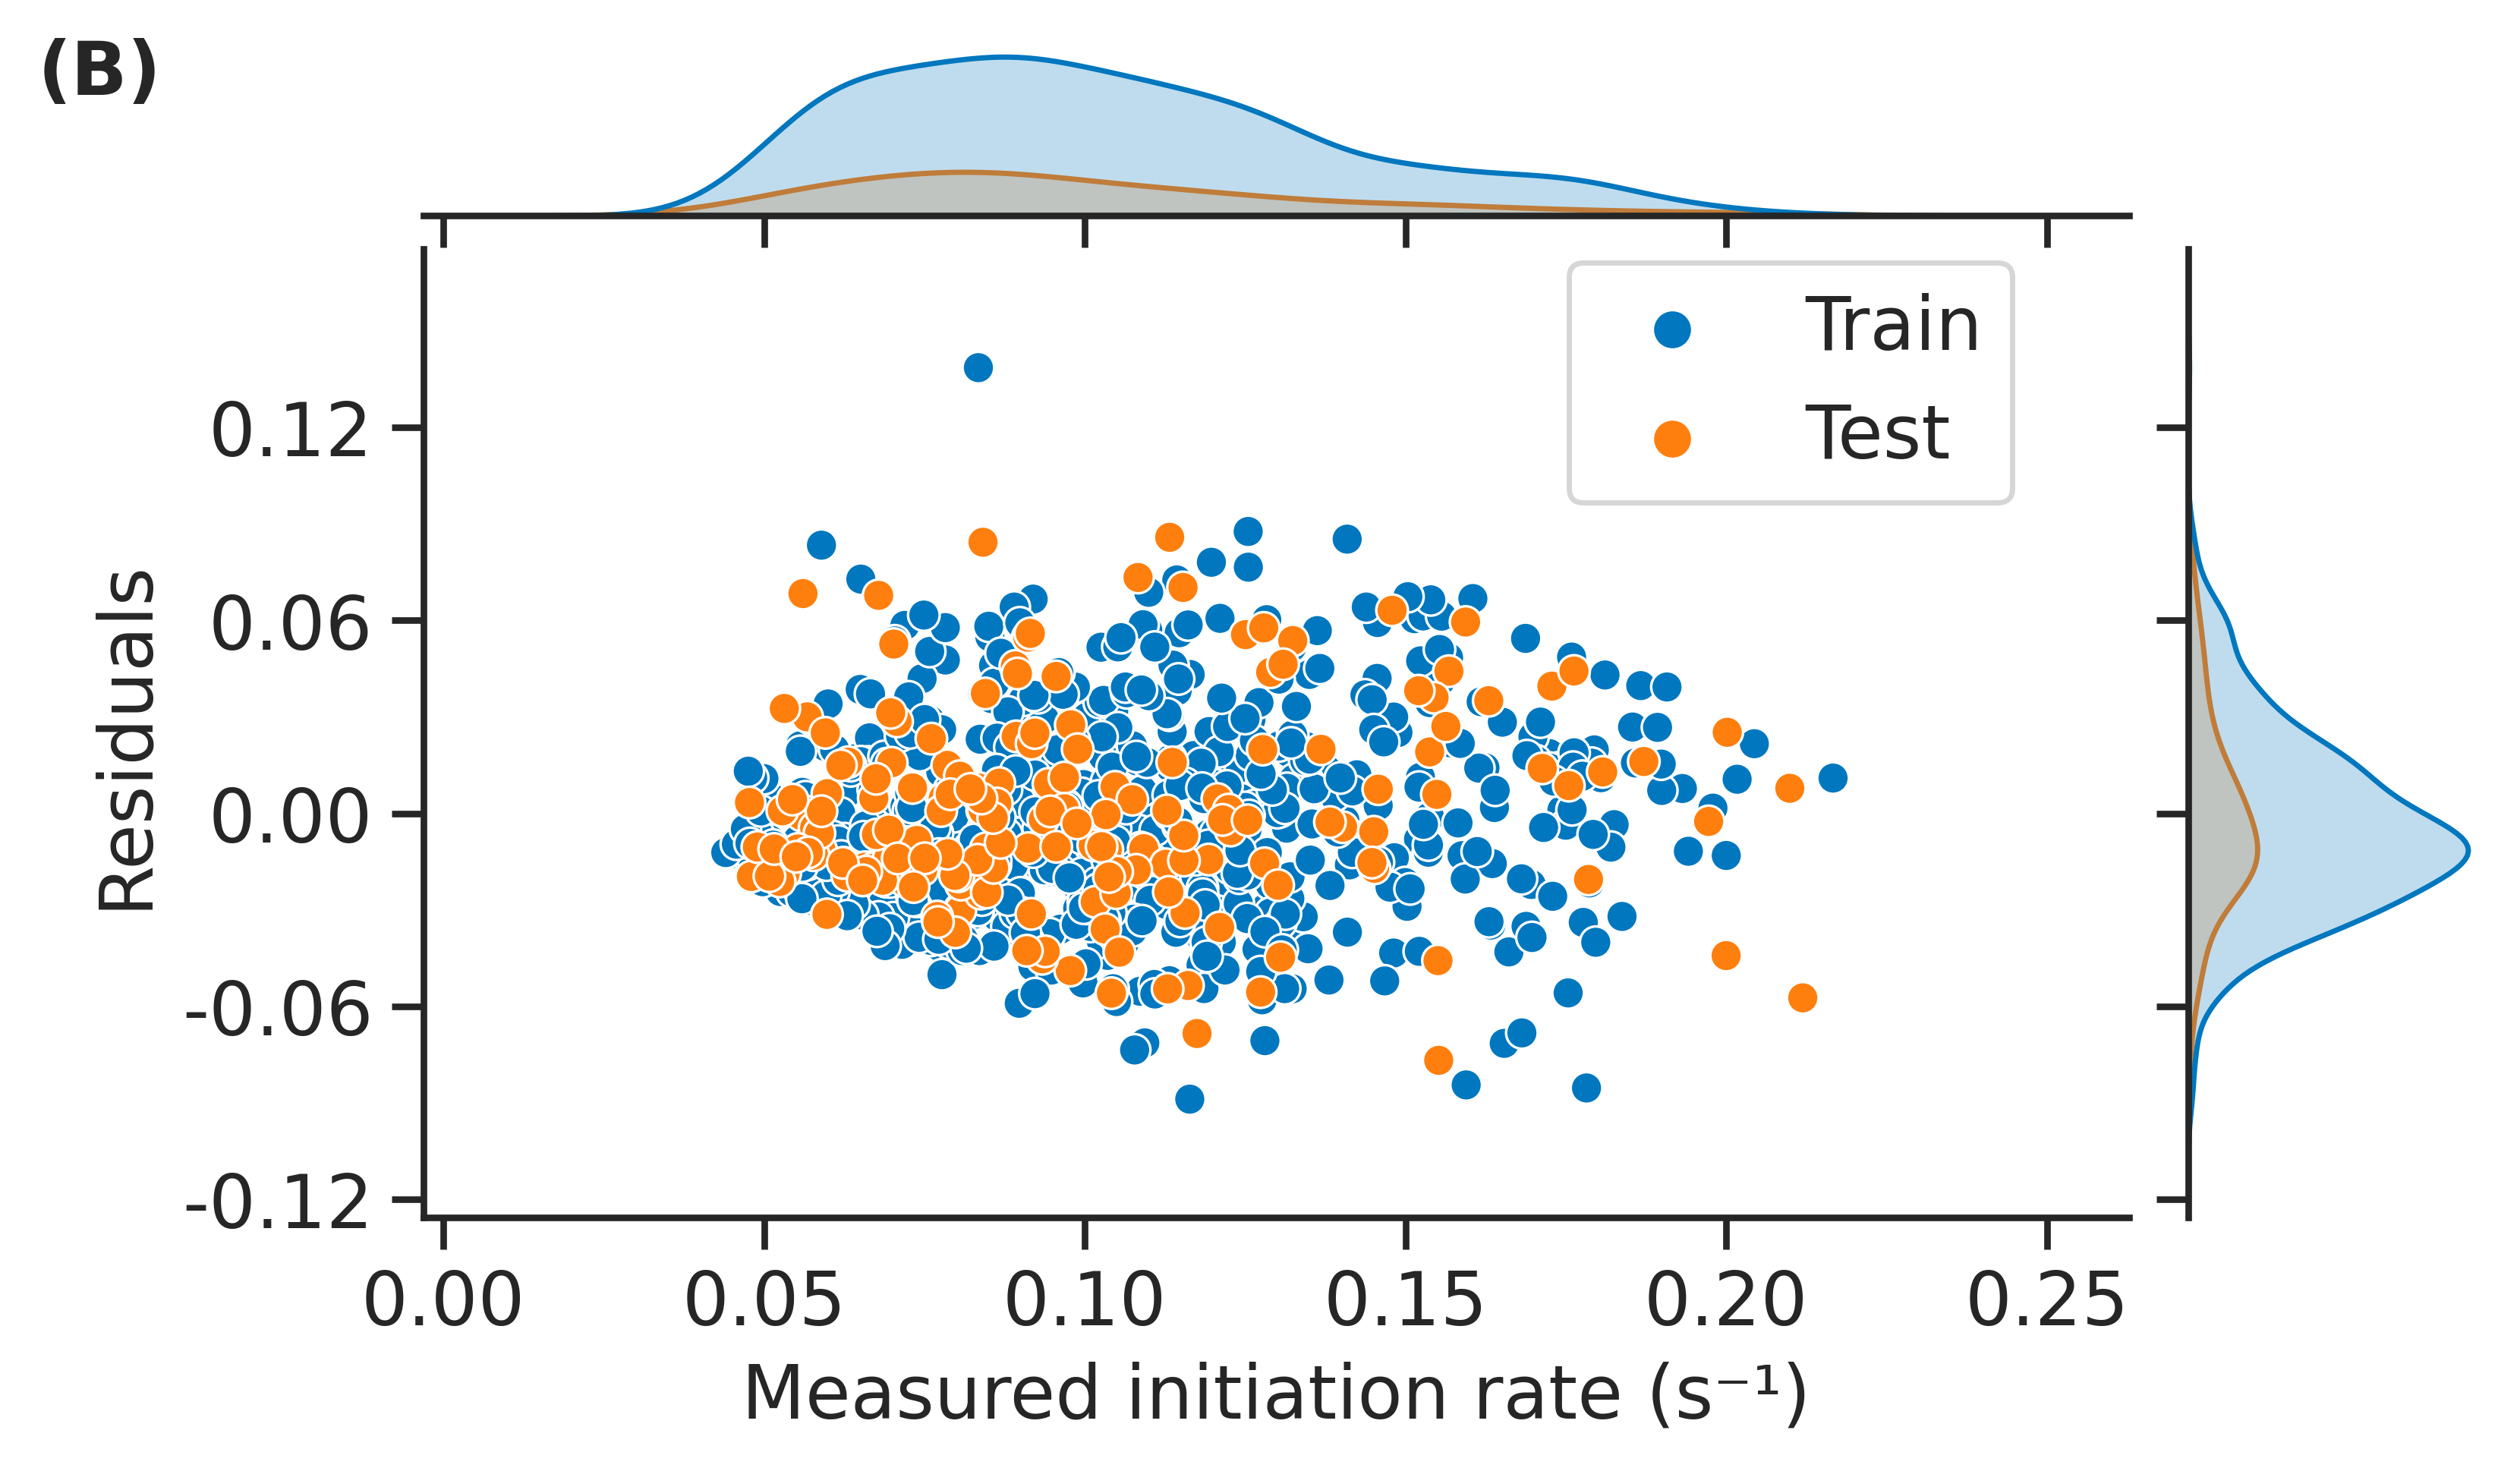

In [635]:
# Combine train and test data
residuals_train = y_train - y_train_pred

plot_data_train = pd.DataFrame()
plot_data_train['Residuals'] = residuals_train.ravel()
plot_data_train['Translation initiation rate'] = y_train_pred.ravel()
plot_data_train['Dataset'] = 'Train'

residuals_test = y_test - y_test_pred
plot_data_test = pd.DataFrame()
plot_data_test['Residuals'] = residuals_test.ravel()
plot_data_test['Translation initiation rate'] = y_test_pred.ravel()
plot_data_test['Dataset'] = 'Test'

plot_data_combined = pd.concat([plot_data_train, plot_data_test])

# Plotting
sns.set(style="ticks", font_scale= 5, rc={"figure.dpi": 500})
# Combined plot using jointplot
g = sns.jointplot(x='Translation initiation rate', y='Residuals', data=plot_data_combined, hue='Dataset', palette={'Train': '#0077be', 'Test': '#ff7f0e'}, height=6)
g.fig.set_size_inches(7, 4)
g.ax_joint.set_ylabel('Residuals', fontsize=14)
g.ax_joint.set_xlabel('Measured initiation rate (s⁻¹)', fontsize=14)
g.ax_joint.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ensure equally distributed tick labels on x-axis
g.ax_joint.set_xticklabels([f'{x:.2f}' for x in g.ax_joint.get_xticks()], fontsize=14)  # Set tick labels to 2 decimal points
g.ax_joint.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Ensure equally distributed tick labels on y-axis
g.ax_joint.set_yticklabels([f'{y:.2f}' for y in g.ax_joint.get_yticks()], fontsize=14)  # Set tick labels to 2 decimal points
g.ax_joint.legend(bbox_to_anchor=(0.65, 0.7), fontsize=14, title_fontsize=14)

# Add label (A) in the top-left corner
g.fig.text(-0.02, 0.85, '(B)', fontsize=14, fontweight='bold', transform=g.fig.transFigure)

plt.show()


## Save Model as Pickle Object

In [613]:
import pickle
pickle.dump(model, open('tir_xgb_model.pkl', 'wb'))

In [614]:
results_train = pd.DataFrame({'True Values': y_train, 'Predicted Values': y_train_pred})
results_train.to_csv('RF_train_set.csv', index= False)
results_test = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_test_pred})
data = pd.concat([results_train, results_test], axis=0)

In [621]:
df2

,gene_name,romano_initiation_rate,gene_length,folding_energy_70,folding_energy_80,length_of_5prime_utr,kozak_score,N1,N4,in_frame AUG
0,YOL076W,0.07395,797,-8.2,-6.5,23,5,4,1,0
1,YGL204C,0.12524,102,-11.3,-8.6,61,4,4,3,0
2,YMR204C,0.16670,421,-8,-11.2,51,3,1,3,0
3,YOR386W,0.08171,566,-4.7,-4.7,16,3,4,1,0
4,YDL240W,0.02254,1018,-10.9,-10.4,174,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...
1021,YMR268C,0.14914,445,-12.2,-8.9,43,3,3,1,0
1022,YML127W,0.08978,582,-6.9,-11.7,49,3,2,1,0
1023,YOL137W,0.09928,498,-5.6,-11.8,182,5,2,1,0
1024,YOR060C,0.03961,258,-10.8,-10.0,43,3,4,2,0


In [622]:
gene_name_new = []

for i in range(len(data)):
    if data['True Values'][i] in df2['romano_initiation_rate'].values:
        gene_name_new.append(df2.loc[df2['romano_initiation_rate'] == data['True Values'][i], 'gene_name'].iloc[0])
    else:
        gene_name_new.append(None)

data['gene_name'] = gene_name_new

In [623]:
data[data['Predicted Values'] == data['Predicted Values'].min()]

,True Values,Predicted Values,gene_name
682,0.03185,0.044026,YOL036W


In [624]:
data[data['Predicted Values'] == data['Predicted Values'].max()]

,True Values,Predicted Values,gene_name
195,0.22764,0.216644,YGR027C


## Comparison with other datasets

In [626]:
df3 = pd.read_csv('data_final - data_final.csv')
df3 = df3.drop(['s_no.'], axis=1)
df3

,gene,romano_initiation_rate,gene_length,weinberg_initiation_rate,dou_duck_initiation_rate,metabolic_cost,cai,mRNA_half_life,protein_copy_number,protein_per_mRNA,...,7,8,9,10,11,12,GC,frac GC,in_frame AUG,out_frame AUG
0,YAL008W,0.15050,199,0.276835,NaN,28.721106,0.115,27.5,1993.64239,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YBR255W,0.03368,695,NaN,NaN,25.125899,0.111,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YGR164W,0.27984,112,NaN,NaN,28.750000,0.119,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YGR131W,0.22936,175,NaN,NaN,28.242857,0.102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNL003C,0.09958,285,NaN,NaN,26.849123,0.115,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,YPR117W,0.02378,2490,NaN,NaN,27.781526,0.122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,YHR086W,0.05300,524,NaN,NaN,24.621183,0.124,5.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666,YBR015C,0.14430,598,0.067900,0.063924,27.790134,0.170,4.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6667,YPL013C,0.26796,122,0.117000,NaN,25.950820,0.087,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [627]:
df3['weinberg_initiation_rate']

0       0.276835
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6664         NaN
6665         NaN
6666    0.067900
6667    0.117000
6668         NaN
Name: weinberg_initiation_rate, Length: 6669, dtype: float64

In [628]:
weinberg_initiation_rate = []

for gene_name in data['gene_name']:
    if gene_name in df3['gene'].values:
        weinberg_initiation_rate.append(df3.loc[df3['gene'] == gene_name, 'weinberg_initiation_rate'].iloc[0])
    else:
        weinberg_initiation_rate.append(None)

df4 = data.copy() 
df4['weinberg_initiation_rate'] = weinberg_initiation_rate[:len(data)]
df4 = df4[df4['weinberg_initiation_rate'] <= 0.25]
df4 = df4.dropna()
df4

,True Values,Predicted Values,gene_name,weinberg_initiation_rate
6,0.17821,0.135001,YKL046C,0.109000
7,0.14565,0.158805,YIR034C,0.164000
9,0.06107,0.064933,YMR049C,0.103000
18,0.13420,0.148084,YBR234C,0.096600
20,0.08132,0.107781,YGR220C,0.070700
...,...,...,...,...
901,0.11166,0.107401,YGL043W,0.129130
905,0.12325,0.125388,YDR346C,0.098100
908,0.18616,0.132412,YGR234W,0.115625
909,0.07823,0.067466,YGR061C,0.062800


In [629]:
dou_duck_initiation_rate = []

for gene_name in data['gene_name']:
    if gene_name in df3['gene'].values:
        dou_duck_initiation_rate.append(df3.loc[df3['gene'] == gene_name, 'dou_duck_initiation_rate'].iloc[0])
    else:
        dou_duck_initiation_rate.append(None)
df5 = data.copy() 
df5['dou_duck_initiation_rate'] = dou_duck_initiation_rate[:len(data)]  
df5 = df5.dropna()
df5

,True Values,Predicted Values,gene_name,dou_duck_initiation_rate
6,0.17821,0.135001,YKL046C,0.088404
9,0.06107,0.064933,YMR049C,0.094456
18,0.13420,0.148084,YBR234C,0.102657
25,0.10742,0.115596,YOR046C,0.119905
27,0.12064,0.102855,YGL020C,0.146444
...,...,...,...,...
905,0.12325,0.125388,YDR346C,0.055039
908,0.18616,0.132412,YGR234W,0.098719
909,0.07823,0.067466,YGR061C,0.045637
911,0.05040,0.073292,YNL307C,0.083365


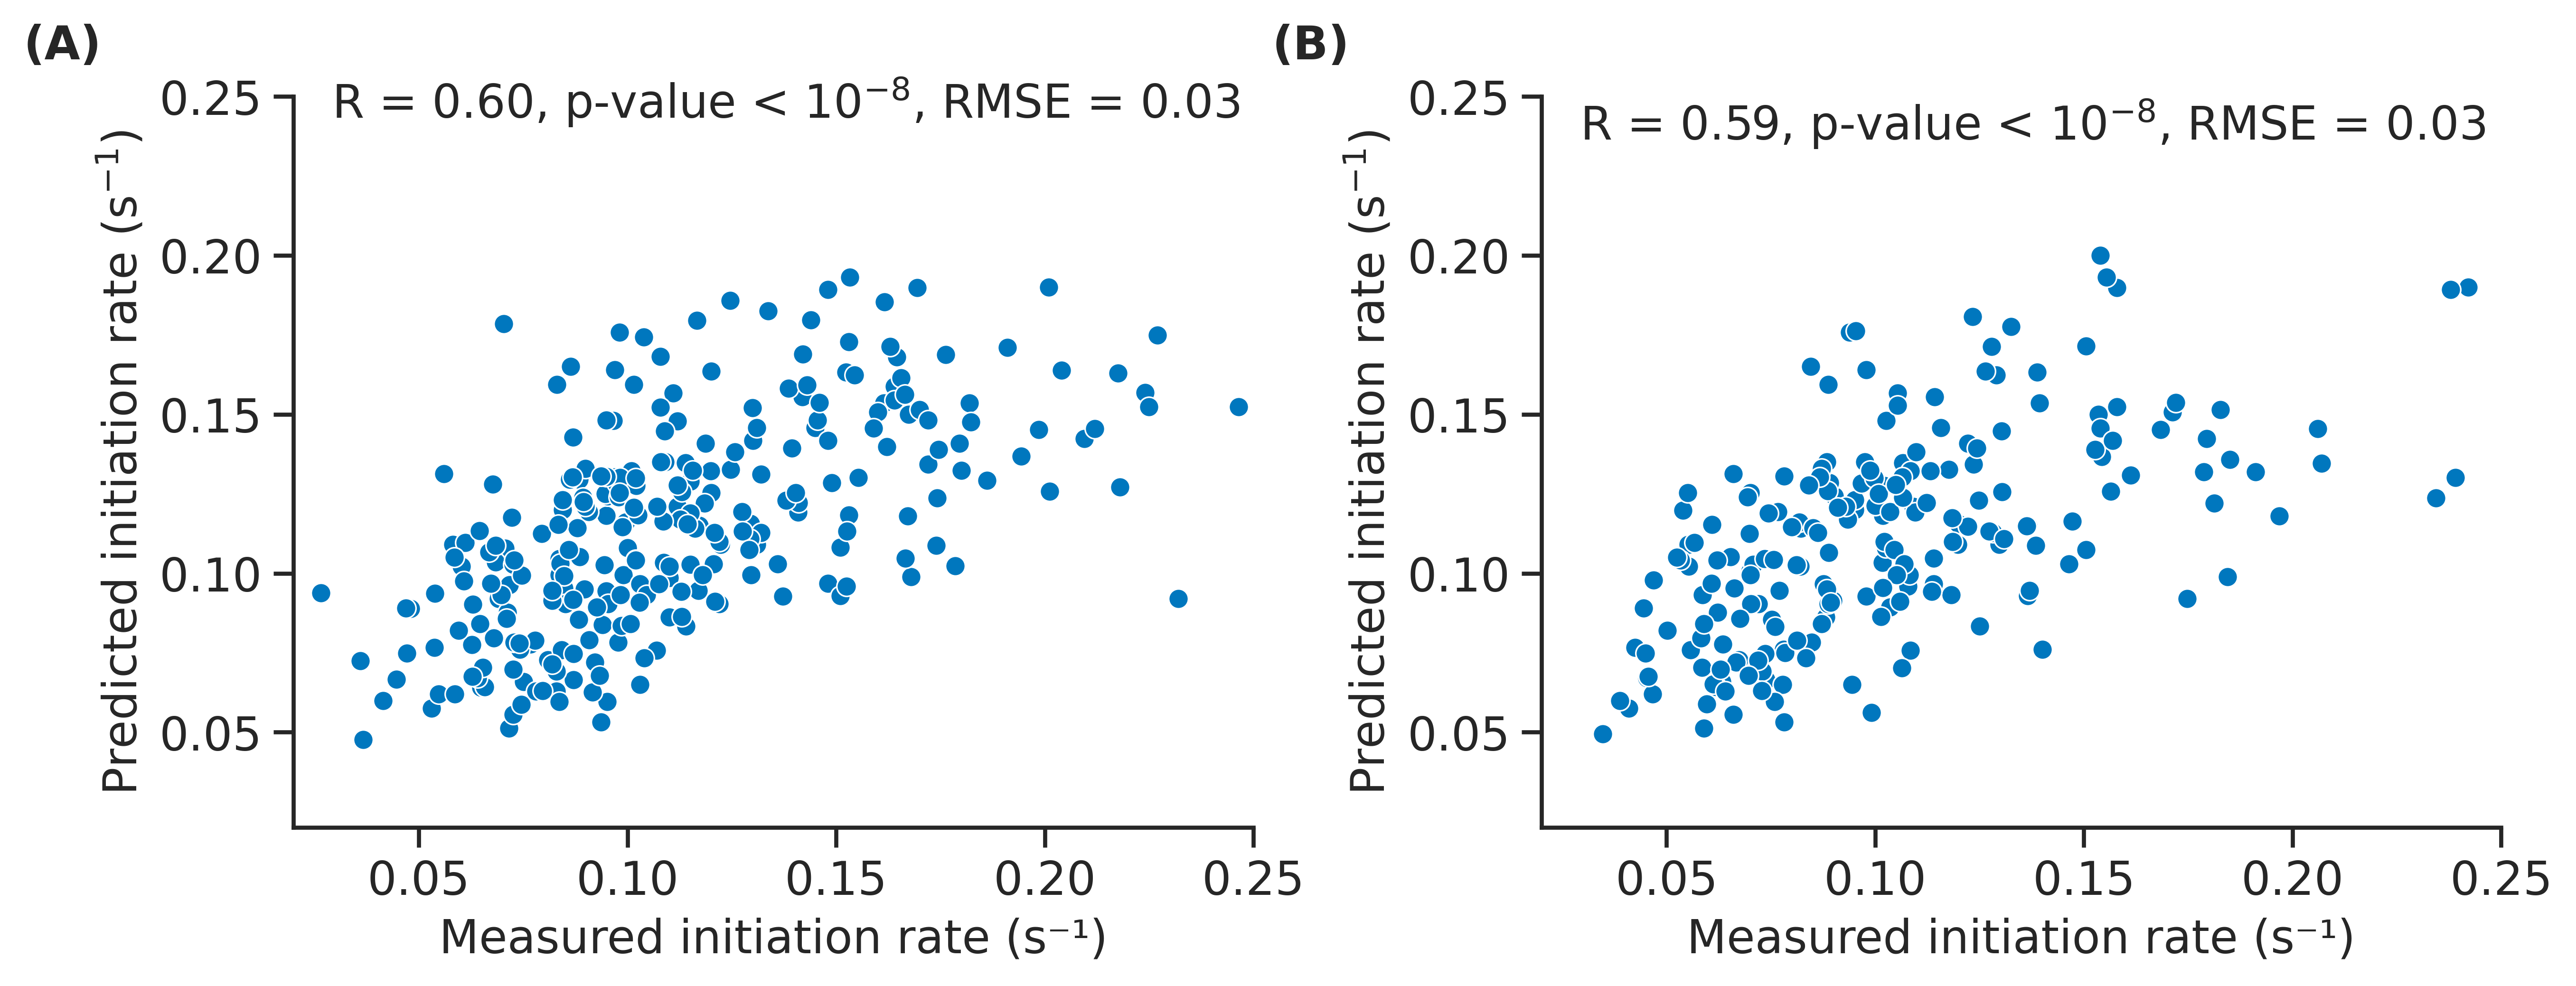

In [639]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4), dpi=500)

# Scatter plot for the first subplot
sns.scatterplot(x=df4['weinberg_initiation_rate'], y=df4['Predicted Values'], ax=ax1, color='#0077be') 
ax1.set_xlabel(r"Measured initiation rate (s⁻¹)", fontsize=14)
ax1.set_ylabel(r"Predicted initiation rate ($\mathrm{s^{-1}}$)", fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=14)
r1, p1 = pearsonr(df4['Predicted Values'], df4['weinberg_initiation_rate'])
mse1 = mean_squared_error(df4['weinberg_initiation_rate'], df4['Predicted Values'])
rmse1 = np.sqrt(mse1)
i = 0
p1_exp = f"{p1:.0e}"
if p1 < 1e-8:
    p1_exp = 'p-value < 10$^{-8}$'
else:
    p1_exp_parts = p1_exp.split('e')
    p1_exp = f"{p1_exp_parts[0]} × 10$^{{{p1_exp_parts[1]}}}$"
ax1.text(0.04, 1.03, f"R = {r1:.2f}, {p1_exp}, RMSE = {rmse1:.2f}", transform=ax1.transAxes, fontsize=14, verticalalignment='top')
ax1.text(-0.2, 1.1, f'({chr(65 + i)})', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# Scatter plot for the second subplot
sns.scatterplot(x=df5['dou_duck_initiation_rate'], y=df5['Predicted Values'], ax=ax2, color='#0077be') 
ax2.set_xlabel(r"Measured initiation rate (s⁻¹)", fontsize=14)
ax2.set_ylabel(r"Predicted initiation rate ($\mathrm{s^{-1}}$)", fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', labelsize=14)
r2, p2 = pearsonr(df5['Predicted Values'], df5['dou_duck_initiation_rate']) 
mse2 = mean_squared_error(df5['dou_duck_initiation_rate'], df5['Predicted Values'])
rmse2 = np.sqrt(mse2)
i = 1
p2_exp = f"{p2:.0e}"
if p2 < 1e-8:
    p2_exp = 'p-value < 10$^{-8}$'
else:
    p2_exp_parts = p2_exp.split('e')
    p2_exp = f"{p2_exp_parts[0]} × 10$^{{{p2_exp_parts[1]}}}$"
ax2.text(0.04, 1, f"R = {r2:.2f}, {p2_exp}, RMSE = {rmse2:.2f}", transform=ax2.transAxes, fontsize=14, verticalalignment='top')
ax2.text(-0.2, 1.1, f'({chr(65 + i)})', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax1.set_ylim(0.02, 0.25)
ax1.set_xlim(0.02, 0.25)
ax2.set_ylim(0.02, 0.25)
ax2.set_xlim(0.02, 0.25)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.show()